In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the data
df = pd.read_csv('C:\\Users\\GK228823\\Downloads\\Squirrel_Data.csv')

In [3]:
print(df)

              X          Y Unique Squirrel ID Hectare Shift      Date  \
0    -73.956134  40.794082     37F-PM-1014-03     37F    PM  10142018   
1    -73.968857  40.783783     21B-AM-1019-04     21B    AM  10192018   
2    -73.974281  40.775534     11B-PM-1014-08     11B    PM  10142018   
3    -73.959641  40.790313     32E-PM-1017-14     32E    PM  10172018   
4    -73.970268  40.776213     13E-AM-1017-05     13E    AM  10172018   
...         ...        ...                ...     ...   ...       ...   
3018 -73.963943  40.790868     30B-AM-1007-04     30B    AM  10072018   
3019 -73.970402  40.782560     19A-PM-1013-05     19A    PM  10132018   
3020 -73.966587  40.783678     22D-PM-1012-07     22D    PM  10122018   
3021 -73.963994  40.789915     29B-PM-1010-02     29B    PM  10102018   
3022 -73.975479  40.769640      5E-PM-1012-01     05E    PM  10122018   

      Hectare Squirrel Number    Age Primary Fur Color  \
0                           3    NaN               NaN   
1      

In [4]:
df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [5]:
# non-null count and data types of the data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [6]:
# select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['X', 'Y', 'Date', 'Hectare Squirrel Number'], dtype='object')


In [7]:
# select non numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Unique Squirrel ID', 'Hectare', 'Shift', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')


In [8]:
# 1. missing data (by columns) count
num_missing = df.isna().sum()
print(num_missing)

X                                                0
Y                                                0
Unique Squirrel ID                               0
Hectare                                          0
Shift                                            0
Date                                             0
Hectare Squirrel Number                          0
Age                                            121
Primary Fur Color                               55
Highlight Fur Color                           1086
Combination of Primary and Highlight Color       0
Color notes                                   2841
Location                                        64
Above Ground Sighter Measurement               114
Specific Location                             2547
Running                                          0
Chasing                                          0
Climbing                                         0
Eating                                           0
Foraging                       

In [9]:
# 1. missing data (by columns) percentage
pct_missing = df.isna().mean()
print(pct_missing)

X                                             0.000000
Y                                             0.000000
Unique Squirrel ID                            0.000000
Hectare                                       0.000000
Shift                                         0.000000
Date                                          0.000000
Hectare Squirrel Number                       0.000000
Age                                           0.040026
Primary Fur Color                             0.018194
Highlight Fur Color                           0.359246
Combination of Primary and Highlight Color    0.000000
Color notes                                   0.939795
Location                                      0.021171
Above Ground Sighter Measurement              0.037711
Specific Location                             0.842541
Running                                       0.000000
Chasing                                       0.000000
Climbing                                      0.000000
Eating    

<AxesSubplot:>

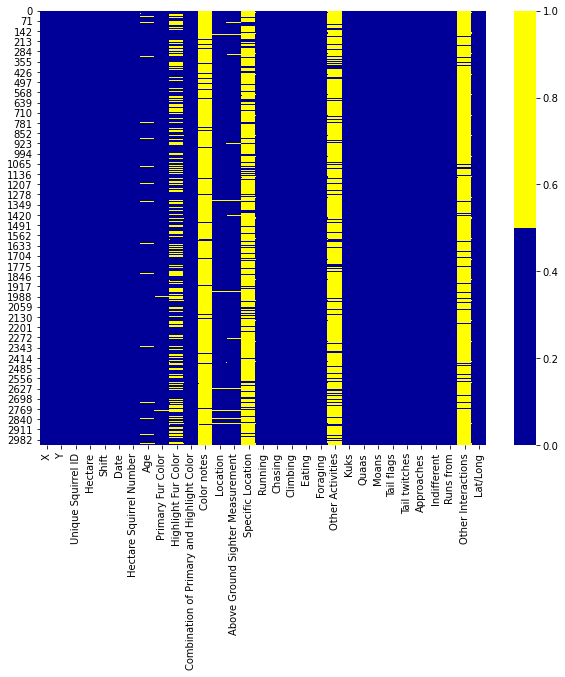

In [13]:
# 2. missing data (by columns) heatmap
plt.figure(figsize=(10,8))

cols = df.columns
colors = ['#000099', '#ffff00'] # specify colors: blue - not missing; yellow - missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colors))

<AxesSubplot:>

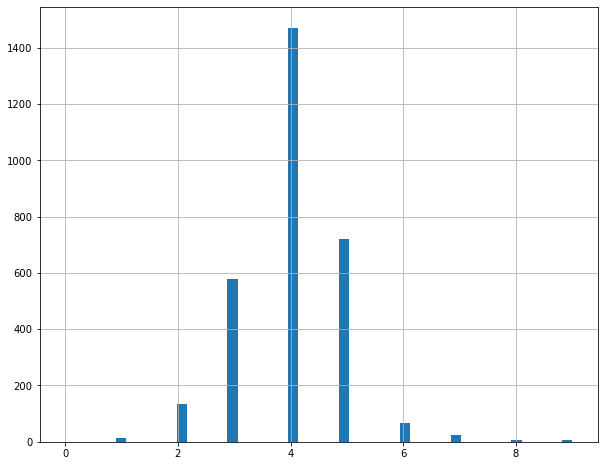

In [32]:
# 3. missing data (by rows) histogram
plt.figure(figsize=(10,8))

missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

In [33]:
# Cleaning technique 1. drop columns / features
df_copy1 = df.copy()
pct_missing[pct_missing > .3]

Highlight Fur Color    0.359246
Color notes            0.939795
Specific Location      0.842541
Other Activities       0.855442
Other Interactions     0.920609
dtype: float64

In [34]:
# drop columns with a lot of missing values.
df_less_missing_cols = df_copy1.loc[:, pct_missing <= .3] # equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(3023, 26)

In [35]:
# Cleaning technique 2. drop rows / observations
df_copy2 = df.copy()
df_less_missing_rows = df_copy2[missing_by_row < 6]
df_less_missing_rows.shape # equivalent to df.dropna(axis='index', thresh=292-35+1).shape

(2916, 31)

In [36]:
# Cleaning technique 3. impute the missing with constant values
df_copy3 = df.copy()
df_copy3[non_numeric_cols] = df_copy3[non_numeric_cols].fillna('_MISSING_')
df_copy3.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,_MISSING_,_MISSING_,_MISSING_,...,False,False,False,False,False,False,False,False,_MISSING_,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,_MISSING_,_MISSING_,_MISSING_,...,False,False,False,False,False,False,False,False,_MISSING_,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,_MISSING_,Gray,_MISSING_,...,False,False,False,False,False,False,False,False,_MISSING_,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,_MISSING_,...,False,False,False,False,False,False,False,True,_MISSING_,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,_MISSING_,POINT (-73.9702676472613 40.7762126854894)


In [37]:
# Cleaning technique 4. impute the missing with statistics

# Since the dataset doesn’t have any missing values for the numeric columns,
# we are going to impute the missing values and create the missing value indicator variables for each non-numeric column
df_copy4 = df.copy()
most_freq = df_copy4[non_numeric_cols].describe().loc['top']
most_freq

Unique Squirrel ID                                                               37E-PM-1006-03
Hectare                                                                                     14D
Shift                                                                                        PM
Age                                                                                       Adult
Primary Fur Color                                                                          Gray
Highlight Fur Color                                                                    Cinnamon
Combination of Primary and Highlight Color                                                Gray+
Color notes                                   Gray & Cinnamon selected as Primary. White sel...
Location                                                                           Ground Plane
Above Ground Sighter Measurement                                                          FALSE
Specific Location                       

In [38]:
# impute with the most frequent value
df_copy4[non_numeric_cols] = df_copy4[non_numeric_cols].fillna(most_freq)
df_copy4.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,runs from (dog),POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,runs from (dog),POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,runs from (dog),POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,runs from (dog),POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,runs from (dog),POINT (-73.9702676472613 40.7762126854894)


In [40]:
# Not using for this time
# import os module
import os

# output the new data
output=os.path.join('C:\\Users\\GK228823\\Downloads\\Squirrel_Data_cleaned.csv')
df_copy4.to_csv(output)

<AxesSubplot:>

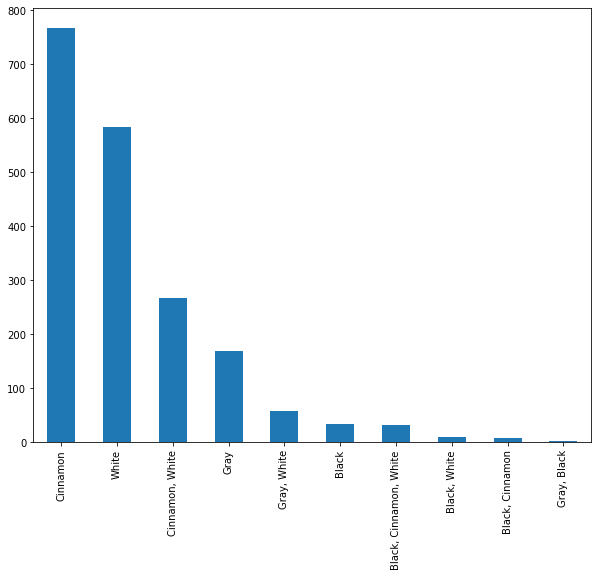

In [44]:
# sample visualizations
# bar chart -  distribution of a categorical variable
plt.figure(figsize=(10,8))
df['Highlight Fur Color'].value_counts().plot.bar()

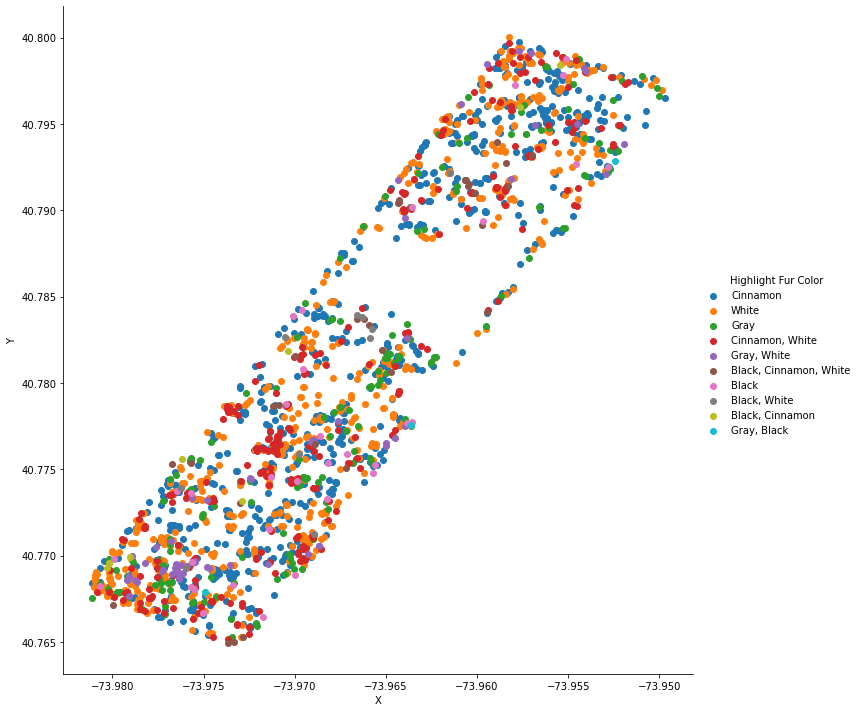

In [49]:
# scatter plot- distribution of a categorical variable
sns.FacetGrid(df, hue='Highlight Fur Color', height=10)\
   .map(plt.scatter, 'X', 'Y')\
   .add_legend()